## _Reinforcment Learning_
### _Markov Decision Processes_

In [1]:
import numpy as np
import random
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
class World:
    def __init__(self):
        self.world = self.environment()
        self.stateValues = self.stateValueEstimates()
        self.agentState = [7,1] 
        self.goal = [1,1]
        self.foundGoal = False
        
    def environment(self): 
        """
        Generates a 7x7 grid world where -1's indicate walls/obstacles.
        """
        gridWorld = np.zeros((9,9), dtype = np.int16)

        # Internal Walls
        gridWorld[3,1:7] = -1 

        # External Walls
        gridWorld[0,:] = -1
        gridWorld[8,:] = -1
        gridWorld[:,0] = -1
        gridWorld[:,8] = -1
        
        return gridWorld
    
    def rewardFunction(self):
        """
        Each time the agent makes a move is recieves a reward of -1.
        When it finds the goal position it recieves an additional reward of 20.
        Th reward is returned and the state variable indicating weather the reward is founf or not is updated.
        """
        if self.agentState == self.goal:
            reward = 20 - 1
            self.foundGoal = True
            self.world[1,1] = 999
        else:
            reward  = -1
            self.foundGoal = False
        return reward
    
    def stateValueEstimates(self):
        """
        The value estimates for each world state is defined here.
        The values are calculated by and hardcoded.
        """
        stateValues = np.array([[-1,-1,-1,-1,-1,-1,-1,-1,-1],
                                 [-1,20,19,18,17,16,15,14,-1],
                                 [-1,19,18,17,16,15,14,13,-1],
                                 [-1,-1,-1,-1,-1,-1,-1,12,-1],
                                 [-1,5,6,7,8,9,10,11,-1],
                                 [-1,4,5,6,7,8,9,10,-1],
                                 [-1,3,4,5,6,7,8,9,-1],
                                 [-1,0,3,4,5,6,7,8,-1],
                                 [-1,-1,-1,-1,-1,-1,-1,-1,-1]])
        return stateValues
        
    def updateEnvironmentConfig(self, action):
        """
        The environmnet configuration is updated with numbers which indicate the directions chosen by the agent.
        """
        if action == 'N':
            self.world[self.agentState[0],self.agentState[1]] = 20
        elif action == 'S':
            self.world[self.agentState[0],self.agentState[1]] = 21
        elif action == 'E':
            self.world[self.agentState[0],self.agentState[1]] = 22
        elif action == 'W':
            self.world[self.agentState[0],self.agentState[1]] = 23
        
        
    def transitionFunction(self, action):
        """
        The dynamics of the agents movement is defined here.
        After the agent chooses an action, the environment decides how that action changes the environments configuration.
        Given the agents action, the output is the agents new state in the environment after that action has been taken.
        Returns the new state and the reward for that state.
        Note: The Agent stays in palce if it moves into a wall or obstacle.
        """
        # Indicate agents action to take in the environment
        self.updateEnvironmentConfig(action)
        
        # Determine agents new state in the environment 
        if action == 'N':
            self.agentState[0] -= 1
            # check if agent moves into wall or obstacle
            if self.world[self.agentState[0], self.agentState[1]] == -1: 
                self.agentState[0] += 1       
        elif action == 'S':
            self.agentState[0] += 1
            # check if agent moves into wall or obstacle
            if self.world[self.agentState[0], self.agentState[1]] == -1:
                self.agentState[0] -= 1  
        elif action == 'E':
            self.agentState[1] += 1
            # check if agent moves into wall or obstacle
            if self.world[self.agentState[0], self.agentState[1]] == -1:
                self.agentState[1] -= 1         
        elif action == 'W':
            self.agentState[1] -= 1
            # check if agent moves into wall or obstacle
            if self.world[self.agentState[0], self.agentState[1]] == -1:
                self.agentState[1] += 1

        # Shows the next state of the agent after the action has been taken
        self.world[self.agentState[0],self.agentState[1]] = 24
        
        return self.agentState, self.rewardFunction()
    
    def resetEnvironment(self):
        """
        Resets the environments configuration.
        """
        self.world = self.environment()
        self.agentState = [7,1] 
        self.foundGoal = False
    
    def showWorld(self, show = False): 
        """
        Displays the current state of the world.
        """
        count = 0
        for idx, vals in np.ndenumerate(self.world):
            
            if show == True:
                if idx == (1,1):
                    print("{0:^3}".format("\u272F"), end="")
                elif idx == (7,1):
                    print("{0:^3}".format("S"), end="")
                else:
                    if vals == -1:
                        print("{0:^3}".format("\u2593"), end="")
                    elif vals == 0:
                        print("{0:^3}".format("\u2591"), end="")

                    elif vals == 20:
                        print("{0:^3}".format("\u2191"), end="")
                    elif vals == 21:
                        print("{0:^3}".format("\u2193"), end="")
                    elif vals == 22:
                        print("{0:^3}".format("\u2192"), end="")
                    elif vals == 23:
                        print("{0:^3}".format("\u2190"), end="")
                    elif vals == 24:
                        print("{0:^3}".format("\u25CF"), end="")
            else:
                if vals == -1:
                    print("{0:^3}".format("\u2593"), end="")
                elif vals == 0:
                    print("{0:^3}".format("\u2591"), end="")

                elif vals == 20:
                    print("{0:^3}".format("\u2191"), end="")
                elif vals == 21:
                    print("{0:^3}".format("\u2193"), end="")
                elif vals == 22:
                    print("{0:^3}".format("\u2192"), end="")
                elif vals == 23:
                    print("{0:^3}".format("\u2190"), end="") 
                elif vals == 24:
                    print("{0:^3}".format("\u25CF"), end="")
                elif vals == 999:
                    print("{0:^3}".format("\u272F"), end="")

                    
            count += 1
            if count%9 == 0:
                print('')
                print('')

In [3]:
class Agent:
    def __init__(self, policy = "random", stateValues = "None Defined"):
        """
        Initialises the agent
        """
        # Agent's state
        self.state = [7,1]
        # Agent's goal state
        self.goal = [1,1]
        # Agent's accumulated reward
        self.accumulatedReward = 0
        # Agent possible action space
        self.actionSpace = ['N','S','E','W']
        # Agent's policy to follow
        self.policy = policy
        # Agent's state values
        self.stateValues = stateValues

    def randomPolicy(self):
        """
        Returns a random action from the agents action space.
        """
        choice = random.choice(['N','S','E','W'])
        return choice
    
    def greedyPolicy(self):
        """
        Searches the state space, using a one step look ahead, for the action with the highest reward
        and returns that action.
        """
        if self.stateValues != "None Defined":
            # Defines rewards for each action
            ActionRewards = {
                'N': self.stateValues[self.state[0]-1, self.state[1]],
                'S': self.stateValues[self.state[0]+1, self.state[1]],
                'E': self.stateValues[self.state[0], self.state[1]+1],
                'W': self.stateValues[self.state[0], self.state[1]-1]
            }
            
            # Creates a list of actions with best rewards. Used for when there are mutiple max rewards
            maxRewardActions = [key for key, val in ActionRewards.items() if val == max(ActionRewards.values())]
            
            # Chooses a random action with best rewards
            maxRewardAction = np.random.choice(maxRewardActions)
        
        else:
            maxRewardAction == "None Defined"
            
        return maxRewardAction
    
    def chooseAction(self):
        """
        Defines a policy for the agent to use.
        """
        if self.policy == "random":
            choice = self.randomPolicy()
        else:
            choice = self.greedyPolicy()
        return choice
    
    def resetAgent(self):
        """
        Resets the agents state.
        """
        self.accumulatedReward = 0
        self.state = [7,1]


## Grid World
Bellow is an illustration of what our gridworld looks like. <br>
The star indicates the agent's goal position and the 'S' indicates the agent's starting poistion. 

In [4]:
world = World()
world.showWorld(show =True)

 ▓  ▓  ▓  ▓  ▓  ▓  ▓  ▓  ▓ 

 ▓  ✯  ░  ░  ░  ░  ░  ░  ▓ 

 ▓  ░  ░  ░  ░  ░  ░  ░  ▓ 

 ▓  ▓  ▓  ▓  ▓  ▓  ▓  ░  ▓ 

 ▓  ░  ░  ░  ░  ░  ░  ░  ▓ 

 ▓  ░  ░  ░  ░  ░  ░  ░  ▓ 

 ▓  ░  ░  ░  ░  ░  ░  ░  ▓ 

 ▓  S  ░  ░  ░  ░  ░  ░  ▓ 

 ▓  ▓  ▓  ▓  ▓  ▓  ▓  ▓  ▓ 



## Random Agent 
Here an agent using a random policy is used to try find the goal location. <br>
The agent has 50 steps to try find the goal position. <br>

In [5]:
# Create world for the random agent
world_random = World()

# Create an Agent with a random policy
agent_random = Agent(policy = "random")

In the display of the world, the arrows indicate directions taken by the agent and the black dot indicates the current position of the agent.

In [6]:
# Random agent run
for i in range(50):
    #clears the notbook output
    clear_output(wait=True) 
    
    # Agent chooses and action based on a policy
    action = agent_random.chooseAction()
    
    # The world adjusts its configuration based on the agents action and returns 
    # the agents new position and the reward it aquires
    state_and_reward = world_random.transitionFunction(action)
    
    # Agent stores new state
    agent_random.state = state_and_reward[0]
    
    # Agent adds the recieved reward to it's current rewards
    agent_random.accumulatedReward += state_and_reward[1]
    
    # Displays the worlds new configuration
    world_random.showWorld()
    
    # Info
    print("\n{} {} {} {}: Past Directions Taken".format("\u2191","\u2193","\u2192","\u2190"))
    print("     {} : Current Position\n".format("\u25CF"))    
    
    # Step
    print("Step: {:>18}".format(i+1))
    
    # Display which action was taken and what rewards was recieved
    print("Last Action Taken: {:>5}\nAccumulated Reward:{:>5}".format(action, agent_random.accumulatedReward))

    
    # Indicates when the goal is achieved
    if world_random.foundGoal == True:
        print("\nFound Target!!!")
        break
        
    # To slow the loop down so that world's changing configuration can be seen more easily. 
    time.sleep(0.2)

# Resets the environment's configuration
world_random.resetEnvironment()

# Resets the agents state
agent_random.resetAgent()

 ▓  ▓  ▓  ▓  ▓  ▓  ▓  ▓  ▓ 

 ▓  ░  ░  ░  ░  ░  ░  ░  ▓ 

 ▓  ░  ░  ░  ░  ░  ░  ░  ▓ 

 ▓  ▓  ▓  ▓  ▓  ▓  ▓  ░  ▓ 

 ▓  ░  ░  →  →  ↓  →  ↓  ▓ 

 ▓  ░  ░  ░  ░  →  ↑  ↓  ▓ 

 ▓  →  ↓  ░  →  →  ↑  ●  ▓ 

 ▓  ↑  →  →  ↑  ░  ░  ░  ▓ 

 ▓  ▓  ▓  ▓  ▓  ▓  ▓  ▓  ▓ 


↑ ↓ → ←: Past Directions Taken
     ● : Current Position

Step:                 50
Last Action Taken:     E
Accumulated Reward:  -50


## Greedy Agent 
Here an agent using a greedy policy is used to try find the goal location. <br>
The agent has 50 steps to try find the goal position. <br>

Each state is given a value which has been computed by hand.

In [7]:
# Create world for the greedy agent
world_greedy = World()

# Create an Agent with a greedy policy
agent_greedy = Agent(policy = "greedy")

# Define the state values for the agent
agent_greedy.stateValues = world_random.stateValueEstimates()

## State Values
Below is the grid which shows what the value of each state is

In [8]:
print(world_greedy.stateValues)

[[-1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 20 19 18 17 16 15 14 -1]
 [-1 19 18 17 16 15 14 13 -1]
 [-1 -1 -1 -1 -1 -1 -1 12 -1]
 [-1  5  6  7  8  9 10 11 -1]
 [-1  4  5  6  7  8  9 10 -1]
 [-1  3  4  5  6  7  8  9 -1]
 [-1  0  3  4  5  6  7  8 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1]]


In [9]:
# Greedy Agent run
for i in range(50):
    #clears the notbook output
    clear_output(wait=True) 
    
    # Agent chooses and action based on a policy
    action = agent_greedy.chooseAction()
    
    # The world adjusts its configuration based on the agents action and returns 
    # the agents new position and the reward it aquires
    state_and_reward = world_greedy.transitionFunction(action)
    
    # Agent stores new state
    agent_greedy.state = state_and_reward[0]
    
    # Agent adds the recieved reward to it's current rewards
    agent_greedy.accumulatedReward += state_and_reward[1]
    
    # Displays the worlds new configuration
    world_greedy.showWorld()
    
    # Info
    print("\n{} {} {} {}: Past Directions Taken".format("\u2191","\u2193","\u2192","\u2190"))
    print("     {} : Current Position\n".format("\u25CF"))    
    
    # Step
    print("Step: {:>18}".format(i+1))
    
    # Display which action was taken and what rewards was recieved
    print("Last Action Taken: {:>5}\nAccumulated Reward:{:>5}".format(action, agent_greedy.accumulatedReward))
    
    # Indicates when the goal is achieved
    if world_greedy.foundGoal == True:
        print("\nFound Target!!!")
        break
        
    # To slow the loop down so that world's changing configuration can be seen more easily.    
    time.sleep(0.2)

# Resets the environment's configuration
world_greedy.resetEnvironment()

# Resets the agents state
agent_greedy.resetAgent()

 ▓  ▓  ▓  ▓  ▓  ▓  ▓  ▓  ▓ 

 ▓  ✯  ←  ←  ←  ←  ←  ←  ▓ 

 ▓  ░  ░  ░  ░  ░  ░  ↑  ▓ 

 ▓  ▓  ▓  ▓  ▓  ▓  ▓  ↑  ▓ 

 ▓  ░  ░  ░  ░  ░  →  ↑  ▓ 

 ▓  ░  ░  →  →  →  ↑  ░  ▓ 

 ▓  ░  ░  ↑  ░  ░  ░  ░  ▓ 

 ▓  →  →  ↑  ░  ░  ░  ░  ▓ 

 ▓  ▓  ▓  ▓  ▓  ▓  ▓  ▓  ▓ 


↑ ↓ → ←: Past Directions Taken
     ● : Current Position

Step:                 18
Last Action Taken:     W
Accumulated Reward:    2

Found Target!!!


## Returns Averaged over 20 Runs
The agents are run for 20 cycles of 50 steps each. <br>
The rewards per cycle are averaged and plotted on a bar graph for comparison.

In [10]:
# Random agent runs
rewardsPerRun_random = []
for runs in range(20):
    for i in range(50):
        # Agent chooses and action based on a policy
        action = agent_random.chooseAction()

        # The world adjusts its configuration based on the agents action and returns 
        # the agents new position and the reward it aquires
        state_and_reward = world_random.transitionFunction(action)

        # Agent stores new state
        agent_random.state = state_and_reward[0]

        # Agent adds the recieved reward to it's current rewards
        agent_random.accumulatedReward += state_and_reward[1]

        # Indicates when the goal is achieved
        if world_random.foundGoal == True:
            break
            
    # Store final rewards
    rewardsPerRun_random.append(agent_random.accumulatedReward)
    
    # Resets the environment's configuration
    world_random.resetEnvironment()

    # Resets the agents state
    agent_random.resetAgent()
    
# Calculate final average reward
averageReward_random = sum(rewardsPerRun_random)/len(rewardsPerRun_random)

In [11]:
# Greedy agent runs
rewardsPerRun_greedy = []
for runs in range(20):
    for i in range(50):
        # Agent chooses and action based on a policy
        action = agent_greedy.chooseAction()

        # The world adjusts its configuration based on the agents action and returns 
        # the agents new position and the reward it aquires
        state_and_reward = world_greedy.transitionFunction(action)

        # Agent stores new state
        agent_greedy.state = state_and_reward[0]

        # Agent adds the recieved reward to it's current rewards
        agent_greedy.accumulatedReward += state_and_reward[1]

        # Indicates when the goal is achieved
        if world_greedy.foundGoal == True:
            break
            
    # Store final rewards
    rewardsPerRun_greedy.append(agent_greedy.accumulatedReward)
    
    # Resets the environment's configuration
    world_greedy.resetEnvironment()

    # Resets the agents state
    agent_greedy.resetAgent()
    
# Calculate final average reward
averageReward_greedy = sum(rewardsPerRun_greedy)/len(rewardsPerRun_greedy)

### Bar Graph for Comparison 

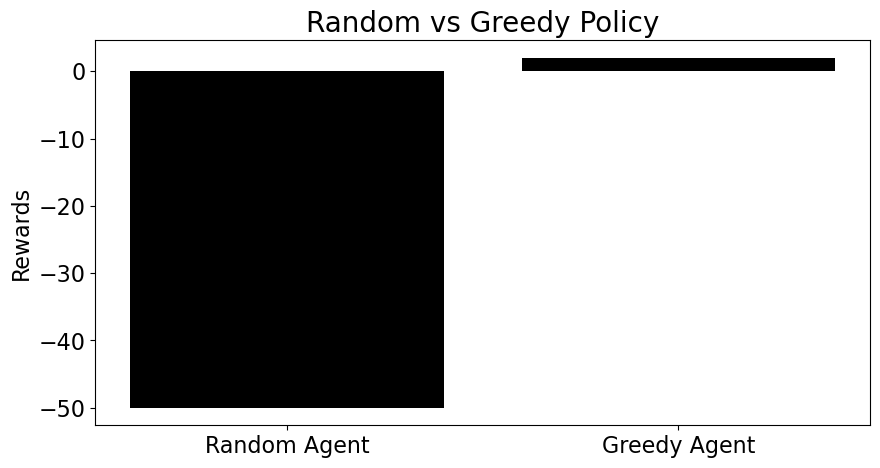

In [12]:
fig = plt.figure(figsize = (10, 5))

# Set global font size
plt.rcParams['font.size'] = '16'

# Create the bar plot
plt.bar(["Random Agent", "Greedy Agent"], [averageReward_random, averageReward_greedy] , color ='black',
        width = 0.8)

# Set axis labels and titles
plt.ylabel("Rewards")
plt.title("Random vs Greedy Policy", fontsize=20)
plt.show()

## Side-by-side illustration of sample trajectories

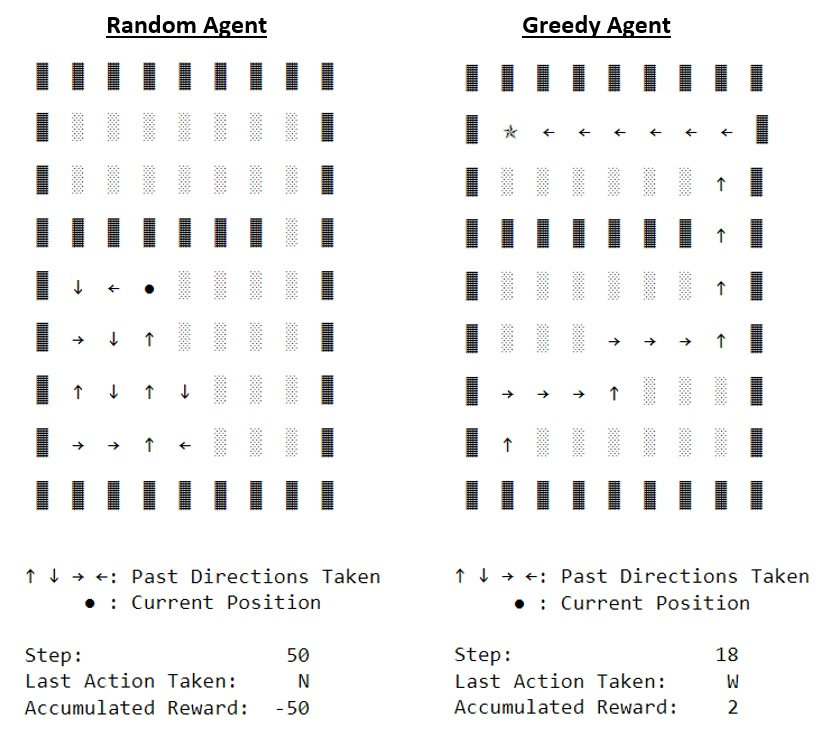